In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

In [5]:
data = [
    [3,1,5,1],
    [2,1,0,1],
    [4,1,5,1],
    [3,1,0,0],
    [3,5,0,1],  
    [2,0,5,0],
    [5,5,1,1],
    [1,1,0,0]
]

mystery_flower = [4,5,1]

In [11]:
#           network
#              o  flower type
#        wl,  / \  w2    b
#    length  o   o  width

In [13]:
def sigmoid(X):
    return 1/(1+np.exp(-X))
def sigmoid_P(x):
    return sigmoid(x)*(1-sigmoid(x))

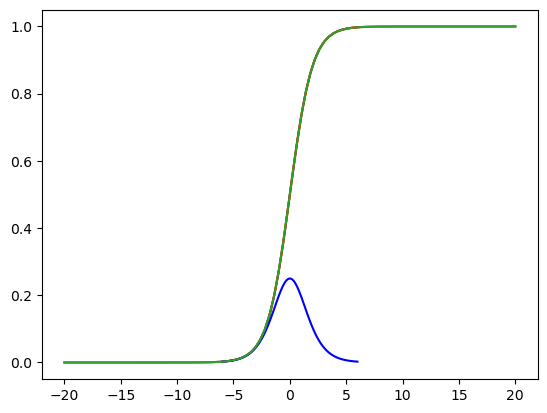

In [19]:
T=np.linspace(-20,20,100)
Y=sigmoid(T)
plt.plot(T,Y)
plt.show() 

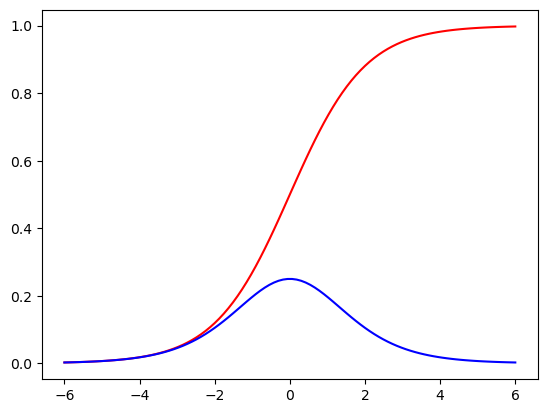

In [21]:
T=np.linspace(-6,6,100)
plt.plot(T,sigmoid(T),c='r')
plt.plot(T,sigmoid_P(T),c='b')
plt.show() 

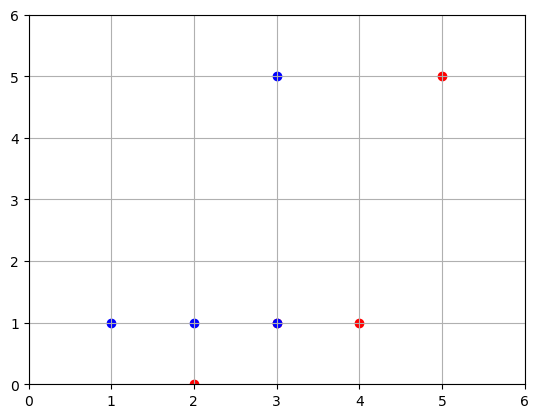

In [31]:
plt.axis([0,6,0,6])
plt.grid()
for i in range(len(data)):
    point=data[i]
    color="r"
    if point[2]==0:
        color="b"
    plt.scatter(point[0],point[1], c=color)
plt.show() 

In [33]:
learning_rate=0.3
costs=[]
w1=np.random.randn()
w2=np.random.randn()
b=np.random.randn()

In [35]:
for i in range(100000):
    ri=np.random.randint(len(data))
    point=data[ri] 
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    target=point[2]
    cost=np.square(pred-target)

In [49]:
dcost_pred=2*(pred-target)
dpred_dz=sigmoid_P(z)*(1-sigmoid(z))
dz_dw1=point[0]
dz_dw2=point[1]
dz_db=1
dcost_dz=dcost_pred*dpred_dz
dcost_dw1=dcost_dz*dz_dw1
dcost_dw2-dcost_dz*dz_dw2
dcost_db=dcost_dz*dz_db
w1=w1-learning_rate*dcost_dw1
w2=w2-learning_rate*dcost_dw2
b=b-learning_rate*dcost_db

In [65]:
costs = []

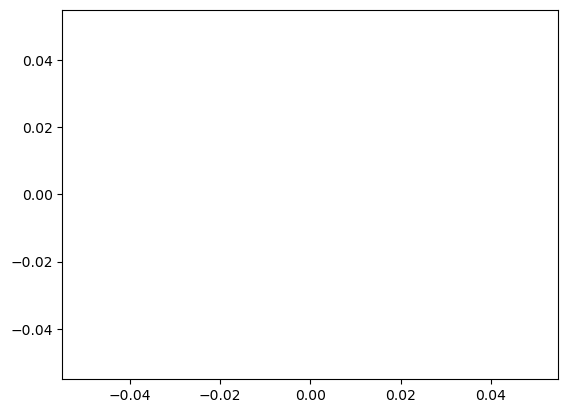

In [67]:
if i % 100==0:
      cost_sum=0
      for j in range(len(data)):
          point=data[ri]
          z=point[0]*w1+point[1]*w2+b
          pred=sigmoid(z)
          target=point[2]
          cost_sum+=np.square(pred-target)
      costs.append(cost_sum/len(data))
plt.plot(costs)
plt.show() 

In [71]:
w1

1.7140260843825201

In [73]:
w2

0.36109492619675027

In [75]:
b

0.4264613177167208

In [77]:
for i in range (len(data)):
    point=data[i]
    print(point)
    z=point[0]*w1+point[1]*w2+b
    pred=sigmoid(z)
    print("pred:{}".format(pred))

[3, 1, 5]
pred:0.9973476000858074
[2, 1, 0]
pred:0.9854514483358624
[4, 1, 5]
pred:0.9995211578417207
[3, 1, 0]
pred:0.9973476000858074
[3, 5, 0]
pred:0.9993730484856952
[2, 0, 5]
pred:0.9792555416177813
[5, 5, 1]
pred:0.9999796430204165
[1, 1, 0]
pred:0.9242526726532377


In [79]:
z=mystery_flower[0]*w1+mystery_flower[1]*w2+b
pred=sigmoid(z)
pred

0.9998870034520871

In [81]:
def which_flower(length, width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        print("blue")
    else:
        print("red")

In [85]:
which_flower(0,5)

2.231935948700472
red


In [87]:
which_flower(4,5)

9.088040286230552
red


In [89]:
import os

In [91]:
from gtts import gTTS
tts=gTTS(text='紅色', lang='zh-TW')
tts.save('red.mp3')

tts=gTTS(text='藍色', lang='zh-TW')
tts.save('blue.mp3')

In [93]:
def which_flower(length,  width):
    z=length*w1+width*w2+b
    print(z)
    pred=sigmoid(z)
    if pred<0.5:
        os.system("blue.mp3")
    else:
        os.system("red.mp3")

In [97]:
which_flower(4,5)

9.088040286230552


In [99]:
# Beginner Intro to Neural Networks 11: Neural Network in Javascrit
#  www.youtube.com/watch?v=gQLKufQ35VE

In [103]:
# Beginner Intro to Neural Networks 12: Neural Network in Python from Scratch
# https://www.youtube.com/watch?v=LSr96IZQknc